In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#Imports
import tensorflow as tf
import cv2 as cv
import pandas as pd
import numpy as np

import  os
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.16.1


In [5]:
print(tf.keras.__version__)


3.3.3


In [6]:
import os
print(os.listdir('/kaggle/working'))

['my_model11.keras', 'my_model7.keras', 'my_model6.keras', '.virtual_documents', 'models', 'my_model3.keras', 'my_model8.keras', 'log', 'my_model9.keras']


In [7]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  2


In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [9]:
data_dir = '/kaggle/input/pokemon-generation-one-22k/PokemonData'

os.listdir(os.path.join(data_dir))

['Golbat',
 'Beedrill',
 'Caterpie',
 'Clefable',
 'Raichu',
 'Sandslash',
 'Metapod',
 'Drowzee',
 'Oddish',
 'Charizard',
 'Tauros',
 'Ponyta',
 'Primeape',
 'Spearow',
 'Mankey',
 'Poliwag',
 'Krabby',
 'Rattata',
 'Tentacruel',
 'Graveler',
 'Koffing',
 'Zapdos',
 'Articuno',
 'Psyduck',
 'Bellsprout',
 'Lapras',
 'Butterfree',
 'Weezing',
 'Abra',
 'Muk',
 'Cloyster',
 'Porygon',
 'Flareon',
 'Jigglypuff',
 'Raticate',
 'Venusaur',
 'Dewgong',
 'Horsea',
 'Rhydon',
 'Omanyte',
 'Exeggcute',
 'Kabuto',
 'Ditto',
 'Growlithe',
 'Mew',
 'Electrode',
 'Vileplume',
 'Seaking',
 'Exeggutor',
 'Electabuzz',
 'Chansey',
 'Magmar',
 'Haunter',
 'Ninetales',
 'Clefairy',
 'Nidoran-m',
 'Gyarados',
 'Tangela',
 'Marowak',
 'Snorlax',
 'Nidoqueen',
 'Hitmonchan',
 'Ekans',
 'Sandshrew',
 'Jolteon',
 'Kabutops',
 'Lickitung',
 'Pidgeotto',
 'Shellder',
 'Slowpoke',
 'Pikachu',
 'Poliwrath',
 'Fearow',
 'Magnemite',
 'Hitmonlee',
 'Machoke',
 'Poliwhirl',
 'Magneton',
 'Diglett',
 'Venonat',
 '

In [10]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 20099 files belonging to 151 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
#images as numpy array
batch[0].shape
#1- batch[0] is images
#batch[1] is labels

(32, 256, 256, 3)

In [15]:
batch[1]

array([ 57, 147,  57,  76, 120,  21,  51, 148,  37, 107,  22, 130,  55,
       128, 136,  69,   5, 149,  14, 103,  44,  48,  40, 139, 122,   7,
        99, 136, 102,  51,  56,  70], dtype=int32)

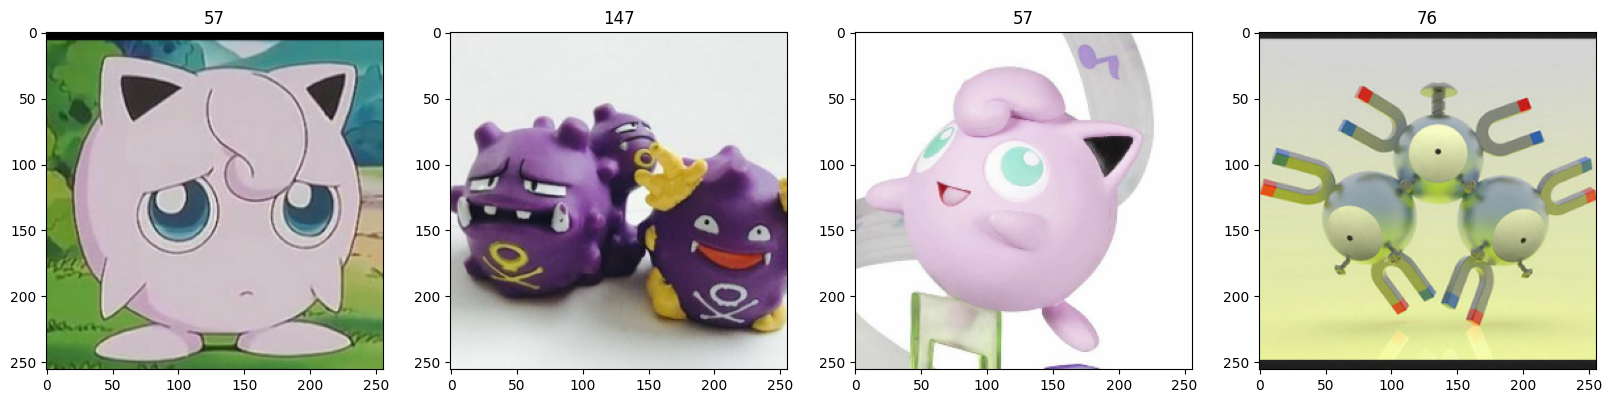

In [16]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
#map allows us to do a transformation as we load a batch we perform a transformation on y

data = data.map(lambda x,y:(x/255,y))


In [18]:
scaled_iterator = data.as_numpy_iterator()

In [19]:
batch = scaled_iterator.next()

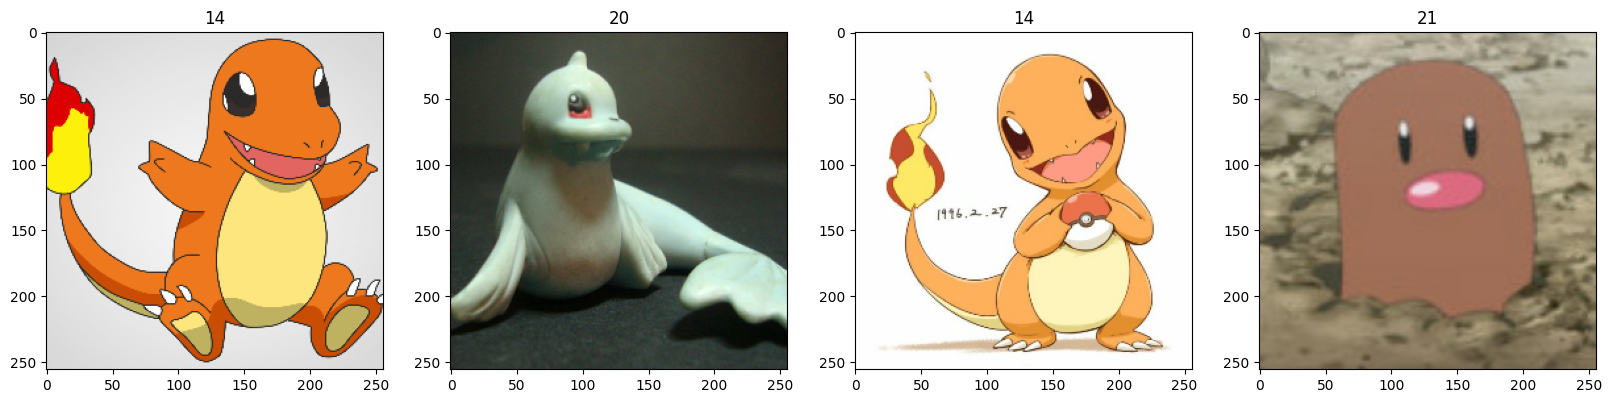

In [20]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

In [21]:
for images, labels in data.take(1):
    print(images.shape)  # Should print (batch_size, 256, 256, 3)


(32, 256, 256, 3)


In [22]:
len(data)

629

In [23]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)+1
test_size = int(len(data)*.1)+1


In [24]:
train_size+val_size+test_size

629

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout,Dense

In [30]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),   # Only horizontal flip
    tf.keras.layers.RandomRotation(0.1),        # Rotate by up to 10%
    tf.keras.layers.RandomZoom(0.1),            # Zoom by up to 10%
    tf.keras.layers.RandomContrast(0.1),        # Adjust contrast by up to 10%
])


In [31]:


Model9 = Sequential()

In [ ]:
Model9.add(data_augmentation)

Model9.add(Conv2D(16,(3,3),1,activation='relu'))
Model9.add(MaxPooling2D())
Model9.add(tf.keras.layers.BatchNormalization())
Model9.add(Conv2D(32,(3,3),1,activation='relu'))
Model9.add(MaxPooling2D())
Model9.add(tf.keras.layers.BatchNormalization())

Model9.add(Conv2D(32,(3,3),1,activation='relu'))
Model9.add(MaxPooling2D())
Model9.add(tf.keras.layers.BatchNormalization())

Model9.add(Conv2D(64,(3,3),1,activation='relu'))
Model9.add(MaxPooling2D())
Model9.add(tf.keras.layers.BatchNormalization())

Model9.add(Conv2D(64,(3,3),1,activation='relu'))
Model9.add(MaxPooling2D())
Model9.add(tf.keras.layers.BatchNormalization())

Model9.add(Conv2D(128,(3,3),1,activation='relu'))
Model9.add(MaxPooling2D())
Model9.add(tf.keras.layers.BatchNormalization())

Model9.add(Flatten())

Model9.add(Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)))
Model9.add(tf.keras.layers.Dropout(0.2))

Model9.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)))
Model9.add(tf.keras.layers.Dropout(0.2) )



Model9.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)))
Model9.add(tf.keras.layers.Dropout(0.3))

Model9.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)))
Model9.add(tf.keras.layers.Dropout(0.3))

Model9.add(Dense(151,activation='softmax'))


In [32]:
Model9.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

logdir = 'log'

In [ ]:
Model9.summary()

In [36]:
import tensorboard

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # or 'val_accuracy'
    patience=10,         # Number of epochs to wait for improvement
    restore_best_weights=True  # Roll back to the best epoch
)

In [43]:
Model9 = tf.keras.models.load_model("/kaggle/working/my_model11.keras")

In [44]:
hist = Model9.fit(data,epochs=200,validation_data=val,callbacks=[tensorboard_callback,early_stopping])

Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


629/629 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8179 - loss: 1.3116

/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


629/629 ━━━━━━━━━━━━━━━━━━━━ 89s 125ms/step - accuracy: 0.8179 - loss: 1.3116 - val_accuracy: 0.9390 - val_loss: 0.8302
Epoch 2/200
629/629 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8169 - loss: 1.3028 - val_accuracy: 0.9427 - val_loss: 0.8077
Epoch 3/200
629/629 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8160 - loss: 1.2970 - val_accuracy: 0.9338 - val_loss: 0.8369
Epoch 4/200
629/629 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8164 - loss: 1.2855 - val_accuracy: 0.9325 - val_loss: 0.8492
Epoch 5/200
629/629 ━━━━━━━━━━━━━━━━━━━━ 59s 93ms/step - accuracy: 0.8144 - loss: 1.3135 - val_accuracy: 0.9333 - val_loss: 0.8457
Epoch 6/200
629/629 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8170 - loss: 1.3175 - val_accuracy: 0.9377 - val_loss: 0.8340
Epoch 7/200
629/629 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.8201 - loss: 1.2910 - val_accuracy: 0.9444 - val_loss: 0.8256
Epoch 8/200
629/629 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.8180 - loss: 1.2961 - val

In [ ]:
model_5 = tf.keras.models.load_model("/kaggle/working/my_model3.keras") # Best Model Using Adam No Regulazation
model_8 = tf.keras.models.load_model("/kaggle/working/my_model8.keras") #Best Model Using Adam with Regulazation
#Model 9 Using Adam and Last Layers is using sigmoid instead of Softmax
#Model 10 no stopping

In [1]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='acc')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_acc')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre = Precision()
re = Recall()
acc = tf.keras.metrics.SparseCategoricalAccuracy()
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = Model9.predict(X)

    acc.update_state(y,yhat)

In [ ]:
print(acc.result()) 

In [ ]:
import pickle

try:
    pickle.dumps(Model9)
    print("Model is serializable!")
except Exception as e:
    print("Error:", e)

In [ ]:
try:
    Model9.save('/kaggle/working/my_model11.keras')
    # model_5.save('/kaggle/working/my_model.h5')  # For HDF5 format
    
    print("Model saved successfully!")
except Exception as e:
    print("Error while saving:", e)


In [ ]:
!mkdir models

In [ ]:
!mv my_model2.keras /kaggle/working/models



In [ ]:
new_model = tf.keras.models.load_model('my_model11.keras')
# model = tf.keras.models.load_model('my_model.h5')
new_model.summary()

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre = Precision()
re = Recall()
acc = tf.keras.metrics.SparseCategoricalAccuracy()
bacc = tf.keras.metrics.SparseCategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = new_model.predict(X)
    y_hat = model_5.predict(X)

    acc.update_state(y,yhat)
    bacc.update_state(y,y_hat)

In [ ]:
print(acc.result())
print(bacc.result())
